### [3회차] 기초통계 과제

#### 주제
Iris 데이터셋을 사용해
1. 종별 Petal Length 평균 차이 검정
2. Petal Length 회귀 예측 모델 구축

#### 1. 데이터 로드 및 구조 확인
**Iris** 데이터셋을 불러오고 구조를 확인하시오.
   - head(), info()로 데이터 구조 확인

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd

# data load
iris = sns.load_dataset('iris')

# verify data structure
print(iris.head())
iris.info()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 2. 기술통계량

Species별 Petal Length의 평균, 개수, 표준편차, 최소/최대, 사분위수 등을 출력하고 그룹별 데이터 개수를 확인하시오.

In [4]:
# species
stats_summary = iris.groupby('species')['petal_length'].describe()
print(stats_summary)

print()

count_table = iris.groupby('species').size().reset_index(name='counts')
print(count_table)

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

      species  counts
0      setosa      50
1  versicolor      50
2   virginica      50


**사용한 메소드**

1. `unique()` : 특정 열에 있는 중복을 제거한 고유값들의 목록을 반환
    ```python
    # 예시: 붓꽃의 종(species)이 무엇무엇이 있는지 확인
    print(iris['species'].unique())
    ```
2. `groupby()` : "Split - Apply - Combine"라는 세 가지 단계를 수행합니다.
    - **1단계 Split (쪼개기)**: 지정한 기준(예: `species`)에 따라
    데이터를 여러 개의 그룹으로 나눈다.
    - **2단계 Apply (적용하기)**: 각 그룹별로 함수를 적용한다.
     (예: 평균 구하기, 개수 세기 등)
    - **3단계 Combine (합치기)**: 결과를 다시 하나의 데이터프레임으로 합친다.
    ```python
    grouped = iris.groupby('species')
    print(grouped['petal_length'].mean())
    ```
3. `describe()` : 데이터의 전반적인 분포. 수치형 데이터인지, 문자열(범주형)
    데이터인지에 따라 보여주는 내용이 다르다.
    - **수치형 데이터**
      - `count`: 데이터 개수
      - `mean`: 평균
      - `std`: 표준편차
      - `min`/`max`: 최솟값/최댓값
      - `25%`, `50%`, `75%`: 사분위수 (데이터 분포 확인용)
    - **문자형(범주형) 데이터**
      - `unique`: 고유값 개수
      - `top`: 가장 많이 등장한 값
      - `freq`: 그 최빈값의 빈도수
4. `reset_index()` : Pandas DataFrame 또는 Series의 인덱스 구조를 재설정하는 메소드.
    정확히는 객체의 인덱스를 현재의 레이블 기반 인덱스에서 기본 정수형
    인덱스(RangeIndex, 0부터 시작하는 순차적 번호)로 변경하고,
    기존 인덱스는 데이터 프레임의 일반 열(Column)로 편입시키는 과정

#### 3. 시각화
Species별 Petal Length의 분포를 Boxplot으로 시각화 하시오.

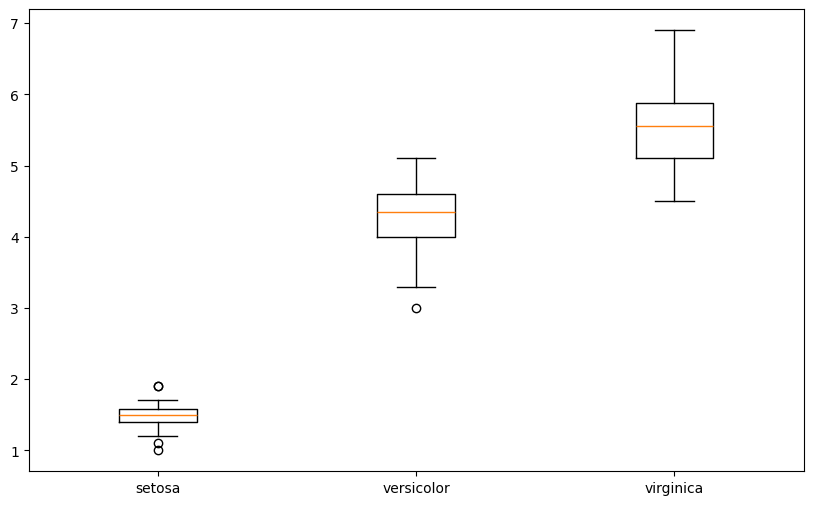

In [5]:
import matplotlib.pyplot as plt

species_type = iris['species'].unique()
species_cnt = len(species_type)

plot_data = []
petal_length = [iris[iris['species']==s]['petal_length'] for s in species_type]

plt.figure(figsize=(10, 6))
plt.boxplot(petal_length, tick_labels=species_type)
plt.show()

#### 붓꽃 종별 길이 Boxplot 해석

이 그래프는 세 가지 붓꽃 종 setosa, versicolor, virginica의 꽃입 분포를 보여준다.

1. **종별 길이 차이** : 꽃잎의 중앙값을 비교했을 때, **setosa < versicolor < virginica** 순으로 뚜렷하게 길어지는 경향을 보인다.
2. **Setosa의 독자성** : Setosa 종은 다른 두 종에 비해 꽃잎 길이가 현저히 짧으며, 분포 범위가 전혀 겹치지 않아 길이만으로도 명확히 구분이 가능하다. 또한, 상자의 폭이 매우 좁은 것으로 보아 같은 종 내에서 길이의 편차가 매우 적고 일관적이다.
3. **Versicolor와 Virginica 비교** : Virginica가 Versicolor보다 전반적으로 꽃잎이 더 길고, 데이터의 퍼짐 정도(분산)도 더 크게 나타난다. 두 종 사이에는 약간의 분포 중첩이 존재한다.

##### 결론

꽃잎 길이는 붓꽃의 종을 구분하는 데 유의미한 특징(feature)이다.

#### 4. 정규성 검정(Shapiro-Wilk)

- **Species**별로 **Shapiro-Wilk** 검정을 실시하시오. (해당 검정에 대한 가설 수립 포함)
- 각 species별 p-value 출력하고, 0.05를 기준으로 해석하시오.
(단, 이후 분석은 정규성을 만족한다고 가정한다.)

##### Preliminaries

**정규성 검정** : 데이터 개수가 적을 때(< 5,000), 데이터가 정규 분포를 따르는 정도를 검증한다.

**정규성 가설**
- 귀무가설($H_0$) : "데이터가 정규 분포를 **따른다**."
- 대립가설($H_1$) : "데이터가 정규 분포를 **따르지 않는다**."

일반적으로 p-value < 0.05라면 귀무가설을 기각한다.

In [7]:
from scipy import stats

ALPHA = 0.05

for i in range(species_cnt):
    # load each species name and length list
    s = species_type[i]
    data = petal_length[i]

    # Shapiro-Wilk test
    statistic, p_value = stats.shapiro(data)

    # print test result
    print(f"[{s}] p-value: {p_value:.4f}")

    if p_value > ALPHA:
        print(f"[{s}] Normality assumption met")
    else:
        print(f"[{s}] Normality assumption violated")

[setosa] p-value: 0.0548
[setosa] Normality assumption met
[versicolor] p-value: 0.1585
[versicolor] Normality assumption met
[virginica] p-value: 0.1098
[virginica] Normality assumption met


#### 5. 등분산성 검정 (Levene)
- Levene 검정을 통해 3개 그룹 간 등분산성을 검정하시오.
- p-value를 출력하고, 0.05를 기준으로 해석하시오.
(단, 이후 분석은 등분산성을 만족한다고 가정한다.)

##### Preliminaries

**등분산성 검정** : 여러 개의 집단이 서로 같은 분산을 공유하는지 검정한다.

**등분산성 가설**
- 귀무가설($H_0$) : "세 집단의 분산이 **모두 같다**."
- 대립가설($H_1$) : "적어도 하나의 집단의 분산이 **다르다**."

일반적으로 p-value < 0.05라면 귀무가설을 기각한다.

In [28]:
# Levene test by unpacking
statistic, p_value = stats.levene(*petal_length)

# print test result
if p_value > ALPHA:
    print("Assumption of homoscedasticity is met.")
else:
    print("Assumption of homoscedasticity is violated.")

Assumption of homoscedasticity is violated.


#### 6. ANOVA 가설 수립

**ANOVA 가설**
- 귀무가설($H_0$) : "세 species 간 평균은 **동일하다**."
- 대립가설($H_1$) : "적어도 하나의 species는 **다른 평균을 가진다**."

일반적으로 p-value < 0.05라면 귀무가설을 기각한다.

#### 7. One-way ANOVA
- **One-way ANOVA**를 실시하시오.
- F값, p-value 확인
- 유의수준 0.05 기준으로 귀무가설 기각 여부를 쓰시오.

In [ ]:
# ANOVA test by unpacking
statistic, p_value = stats.f_oneway(*petal_length)

# print test result
if p_value > ALPHA:
    print("The averages are equal.")
else:
    print("At least one group has a different average.")

At least one group has a different average.


유의수준 0.05 기준으로 귀무가설은 되었다.

#### 8. 사후검정 (Tukey HSD)
- ANOVA 결과 유의하다면 Tukey HSD 사후검정을 실시하시오.
- 어떤 종 사이에 유의미한 차이가 있는지 정리

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# endog: data(petal length), groups: species
tukey_result = pairwise_tukeyhsd(endog=iris['petal_length'],
                                 groups=iris['species'],
                                 alpha=0.05)

print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


**결론**

세 종의 꽃잎 길이는 통계적으로 모두 유의미한 차이가 있다.

#### 9. 결과 요약

- Boxplot, ANOVA, 사후검정 결과를 종합하여
  어떤 그룹의 Petal Length가 통계적으로 유의하게 긴지/짧은지 간단히 결론 지으시오.

**결론**

1. 시각적 분포 특성
    Boxplot을 통한 시각적 검사 결과, 세 품종의 꽃잎 길이는 뚜렷한 차이를 보였다. 중앙값(Median)을 기준으로 Setosa < Versicolor < Virginica 순의 명확한 상승 경향이 관찰되었다. 특히 각 품종의 사분위수 범위(IQR) 상자들은 서로 겹치지 않고(non-overlapping) 계단식으로 분리되어 있어, 꽃잎 길이가 품종을 구분하는 강력한 판별 변수임을 시사한다.
2. 통계적 검정 결과 (Statistical Verification)
   이러한 시각적 차이를 검증하기 위해 일원분산분석(One-way ANOVA)을 실시한 결과, 세 집단 간 평균의 차이는 통계적으로 유의하였다 ($p < 0.05$). 구체적인 집단 간 차이를 규명하기 위해 Tukey의 HSD 사후 검정을 수행하였으며, 그 결과 모든 품종 쌍(pair) 간에 통계적으로 유의미한 평균 차이가 존재함이 확인되었다.
3. 종합 결론 (Conclusion)
    종합하면, Setosa는 가장 짧은 꽃잎 길이를, Virginica는 가장 긴 꽃잎 길이를 보이며, Versicolor는 그 중간 단계에 위치한다. 세 집단은 통계적으로나 시각적으로나 명확히 구분되는 독립적인 분포 특성을 가진다.

#### 10. 회귀 분석

- 입력: sepal_length, sepal_width, petal_width
- 타겟: petal_length
- Train/Test 분리
- Linear Regression 학습
- MSE, R2, 회귀계수 출력 및 해석

In [17]:
from sklearn.model_selection import train_test_split

# input: sepal_length, sepal_width, petal_width
iris_data = np.column_stack((iris.sepal_length, iris.sepal_width, iris.petal_width))
# target: petal_length
iris_target = iris.petal_length

# Train/Test seperation
train_input, test_input, train_target, test_target = train_test_split(
    iris_data, iris_target, random_state=42
)

MSE: 0.11597745901539158
R2 Score (Train): 0.9683177797866379
R2 Score (Test): 0.9658370033397268
Coefficients: [ 0.73564251 -0.64028226  1.46402752]
Intercept: -0.3130909683040555


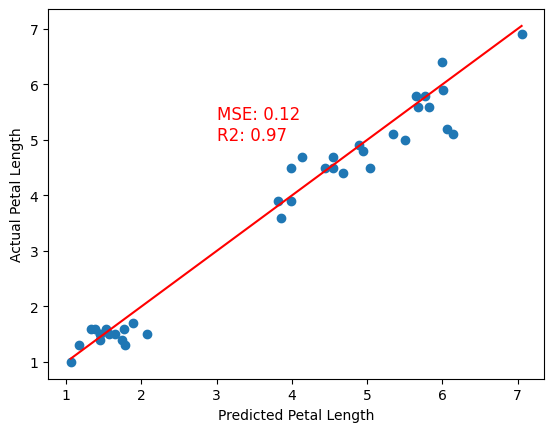

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# train linear regression model
lr.fit(train_input, train_target)
test_pred = lr.predict(test_input)
mse = np.mean((test_pred - test_target) ** 2)

# print mse, r2, lr coef and intercept
print("MSE:", mse)
print("R2 Score (Train):", lr.score(train_input, train_target))
print("R2 Score (Test):", lr.score(test_input, test_target))
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

# (optional) visualized check
plt.scatter(test_pred, test_target)
plt.plot([min(test_pred), max(test_pred)], 
         [min(test_pred), max(test_pred)], 
         color='red')
plt.text(3, 5, 
         f"MSE: {mse:.2f}\nR2: {lr.score(test_input, test_target):.2f}", 
         fontsize=12, color='red')
plt.xlabel("Predicted Petal Length")
plt.ylabel("Actual Petal Length")
plt.show()